#  🪁Kite Detection using 🚀 YOLO V5 model.

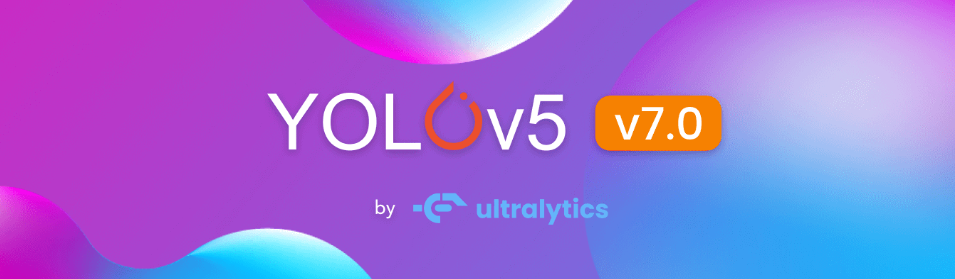

## Import required Libraries

In [ ]:
# YOLOv5 implemented using pytorch
import torch 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Clone YOLOV5 from Github.

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14992, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 14992 (delta 0), reused 1 (delta 0), pack-reused 14989
Receiving objects: 100% (14992/14992), 14.01 MiB | 18.23 MiB/s, done.
Resolving deltas: 100% (10294/10294), done.


In [ ]:
torch.cuda.get_arch_list() 

['sm_37', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'sm_80', 'sm_86']

In [ ]:
print('All set. Using PyTorch version %s with %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


All set. Using PyTorch version 1.13.0+cu116 with _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


## Import Dataset from Roboflow.

The format for dataset is "Yolov5 Pytorch" from Roboflow.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dMwwevKp5n1ERleo3og4")
project = rf.workspace("mayuresh-madiwale-m4ijr").project("kite-detector")
dataset = project.version(5).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 17.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=d54b46065ec24f8e97e393c24eba9104548860cad680dd23bf0d599ec91d6b0e
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypars

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to kite-detector-5 in yolov5pytorch:: 100%|██████████| 2868/2868 [00:01<00:00, 2644.07it/s]


In [ ]:
%cd /content/drive/MyDrive/yolov5with_video
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir runs/train

## Run Training script

--img --> image size to be fed as input size

--batch --> batch size to be set as per system's capacity

--epochs --> number of epochs for training

--data --> data.yaml file from dataset has to be shifted to yolov5/data and changes has to be done such as proper image paths for train, test and valid folders.

--weights --> choose from 5 models offered by ultralytics. yolov5n, yolov5s, yolov5m, yolov5l and yolov5x

--cache --> Helps the trainloaders load images for next batch which makes the training faster.

--patience --> Early stopping the model training if there is no improvement found in last 50 epochs.

Transfer Learning is been done on YOLOV5 model. Specifically YOLOV5s model is being used.

In [ ]:
%cd /content/drive/MyDrive/yolov5with_video
!python train.py --img 320 --batch 64 --epochs 300 --data dataset.yaml --weights yolov5s.pt --cache --patience 50

/content/drive/MyDrive/yolov5with_video
requirements: YOLOv5 requirement "gitpython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.4 MB/s eta 0:00:00

requirements: 1 package updated per ['gitpython']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=64, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=50, freeze=[0], save_period=-1, s

Box Precision ==> 86.5%

Recall ==> 85.5%

mAP50 ==> 88%

mAP50-95 ==> 49.4%

## Detection/Inferencing on test images and videos

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt --img 320 --conf 0.25 --source /content/20230107_173517.mp4 --line-thickness 1 

detect: weights=['/content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt'], source=/content/20230107_173517.mp4, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/1429) /content/20230107_173517.mp4: 320x192 (no detections), 18.2ms
video 1/1 (2/1429) /content/20230107_173517.mp4: 320x192 (no detections), 13.9ms
video 1/1 (3/1429) /content/20230107_173517.mp4: 320x192 (no detections), 16.2ms
video 1/1 (4/1429) /content/20230107_173517.mp4: 320x1

In [ ]:
!python /content/yolov5/detect.py --weights /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt --img 320 --conf 0.25 --source /content/20230107_174719.mp4 --line-thickness 1 

detect: weights=['/content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt'], source=/content/20230107_174719.mp4, data=yolov5/data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirements "gitpython" "ipython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.7 MB/s eta 0:00:00

requirements: 2 packages upda

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt --img 320 --conf 0.25 --source /content/20230107_173638.mp4 --line-thickness 1 

detect: weights=['/content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt'], source=/content/20230107_173638.mp4, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/761) /content/20230107_173638.mp4: 320x192 1 kite, 11.9ms
video 1/1 (2/761) /content/20230107_173638.mp4: 320x192 1 kite, 8.3ms
video 1/1 (3/761) /content/20230107_173638.mp4: 320x192 1 kite, 7.9ms
video 1/1 (4/761) /content/20230107_173638.mp4: 320x192 1 kite, 8.0ms
video 1/1 (5/761

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt --img 320 --conf 0.25 --source /content/20230107_174546.mp4 --line-thickness 1 

detect: weights=['/content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt'], source=/content/20230107_174546.mp4, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/1036) /content/20230107_174546.mp4: 320x192 (no detections), 12.4ms
video 1/1 (2/1036) /content/20230107_174546.mp4: 320x192 1 kite, 8.8ms
video 1/1 (3/1036) /content/20230107_174546.mp4: 320x192 (no detections), 8.1ms
video 1/1 (4/1036) /content/20230107_174546.mp4: 320x192 (no dete

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt --img 320 --conf 0.25 --source /content/20230107_174719.mp4 --line-thickness 1 

detect: weights=['/content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt'], source=/content/20230107_174719.mp4, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/626) /content/20230107_174719.mp4: 320x192 (no detections), 17.8ms
video 1/1 (2/626) /content/20230107_174719.mp4: 320x192 (no detections), 8.7ms
video 1/1 (3/626) /content/20230107_174719.mp4: 320x192 (no detections), 24.5ms
video 1/1 (4/626) /content/20230107_174719.mp4: 320x192 (n

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt --img 320 --conf 0.25 --source /content/VID-20180114-WA0010.mp4 --line-thickness 1 

detect: weights=['/content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt'], source=/content/VID-20180114-WA0010.mp4, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/72) /content/VID-20180114-WA0010.mp4: 192x320 1 kite, 13.5ms
video 1/1 (2/72) /content/VID-20180114-WA0010.mp4: 192x320 1 kite, 8.3ms
video 1/1 (3/72) /content/VID-20180114-WA0010.mp4: 192x320 1 kite, 8.7ms
video 1/1 (4/72) /content/VID-20180114-WA0010.mp4: 192x320 1 kite, 7.9ms


In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt --img 320 --conf 0.25 --source /content/VID_24450810_062957_995.mp4 --line-thickness 1 

detect: weights=['/content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt'], source=/content/VID_24450810_062957_995.mp4, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/113) /content/VID_24450810_062957_995.mp4: 320x192 (no detections), 11.7ms
video 1/1 (2/113) /content/VID_24450810_062957_995.mp4: 320x192 (no detections), 9.1ms
video 1/1 (3/113) /content/VID_24450810_062957_995.mp4: 320x192 (no detections), 8.7ms
video 1/1 (4/113) /content/

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt --img 320 --conf 0.25 --source /content/VID_24461113_191944_890.mp4 --line-thickness 1 

detect: weights=['/content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt'], source=/content/VID_24461113_191944_890.mp4, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/113) /content/VID_24461113_191944_890.mp4: 320x192 (no detections), 12.6ms
video 1/1 (2/113) /content/VID_24461113_191944_890.mp4: 320x192 (no detections), 8.3ms
video 1/1 (3/113) /content/VID_24461113_191944_890.mp4: 320x192 (no detections), 8.1ms
video 1/1 (4/113) /content/

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt --img 320 --conf 0.25 --source /content/VID_49710712_060144_155.mp4 --line-thickness 1 

detect: weights=['/content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt'], source=/content/VID_49710712_060144_155.mp4, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/709) /content/VID_49710712_060144_155.mp4: 320x320 1 kite, 7.9ms
video 1/1 (2/709) /content/VID_49710712_060144_155.mp4: 320x320 1 kite, 8.1ms
video 1/1 (3/709) /content/VID_49710712_060144_155.mp4: 320x320 1 kite, 9.0ms
video 1/1 (4/709) /content/VID_49710712_060144_155.mp4:

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt --img 320 --conf 0.25 --source /content/kite-detector-5/test/images --line-thickness 1 

detect: weights=['/content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt'], source=/content/kite-detector-5/test/images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/88 /content/kite-detector-5/test/images/17kite_jpg.rf.e1f4cd937309a4e76629cd9cd04aa648.jpg: 320x320 1 kite, 7.7ms
image 2/88 /content/kite-detector-5/test/images/20230107_173406_mp4-113_jpg.rf.f8c135f36d311edb908202957ecc1d0e.jpg: 320x320 1 kite, 8.3ms
image 3/88 /content/kite-det

## Export the model to tflite so to make a Android app

In [ ]:
#Convert weights to int8 TFLite model

!python export.py --weights /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt --include tflite  --img 320

export: data=data/coco128.yaml, weights=['/content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt'], imgsz=[320], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best.pt with output shape (1, 6300, 6) (13.6 MB)

TensorFlow SavedModel: starting export with tensorflow 2.9.2...

                 from  n    params  module                                  arguments                     
2023-01-08 06:50:08.599968: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE:

## Detect on test images and videos using tflite model

Note that the performance is similar to the .pt model but the inference time is around 10x more. This is because .pt model uses GPU for inferencing and tflite uses CPU. The tflite model cannot be faster than this on CPU and thus our android app will take around same time for inferencing. 

Again this performance is limited by the processor of the smartphone on which it works. A good processor such as Snapdragon 725 will result in better performance.

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best-fp16.tflite --img 320 --conf 0.25 --source /content/20230107_174719.mp4 --line-thickness 1 

detect: weights=['/content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best-fp16.tflite'], source=/content/20230107_174719.mp4, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Loading /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best-fp16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
video 1/1 (1/626) /content/20230107_174719.mp4: 320x320 (no detections), 87.7ms
video 1/1 (2/626) /content/20230107_174719.mp4: 320x320 (no detections), 64.0ms
video 1/1 (3/626) /content/20230107_1747

In [ ]:
!python detect.py --weights  /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best-fp16.tflite --img 320 --conf 0.25 --source /content/VID-20180114-WA0010.mp4 --line-thickness 1 

detect: weights=['/content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best-fp16.tflite'], source=/content/VID-20180114-WA0010.mp4, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Loading /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best-fp16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
video 1/1 (1/72) /content/VID-20180114-WA0010.mp4: 320x320 1 person, 80.5ms
video 1/1 (2/72) /content/VID-20180114-WA0010.mp4: 320x320 1 person, 66.3ms
video 1/1 (3/72) /content/VID-20180114-WA001

In [ ]:
!python detect.py --weights  /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best-fp16.tflite --img 320 --conf 0.25 --source /content/VID_24450810_062957_995.mp4 --line-thickness 1 

detect: weights=['/content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best-fp16.tflite'], source=/content/VID_24450810_062957_995.mp4, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Loading /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best-fp16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
video 1/1 (1/113) /content/VID_24450810_062957_995.mp4: 320x320 (no detections), 79.7ms
video 1/1 (2/113) /content/VID_24450810_062957_995.mp4: 320x320 (no detections), 59.4ms
video 1/1 (3/113

In [ ]:
!python detect.py --weights  /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best-fp16.tflite --img 320 --conf 0.25 --source /content/VID_24461113_191944_890.mp4 --line-thickness 1 

detect: weights=['/content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best-fp16.tflite'], source=/content/VID_24461113_191944_890.mp4, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Loading /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best-fp16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
video 1/1 (1/113) /content/VID_24461113_191944_890.mp4: 320x320 (no detections), 76.5ms
video 1/1 (2/113) /content/VID_24461113_191944_890.mp4: 320x320 (no detections), 60.7ms
video 1/1 (3/113

In [ ]:
!python detect.py --weights  /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best-fp16.tflite --img 320 --conf 0.25 --source /content/VID_49710712_060144_155.mp4 --line-thickness 1 

detect: weights=['/content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best-fp16.tflite'], source=/content/VID_49710712_060144_155.mp4, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Loading /content/drive/MyDrive/yolov5with_video/runs/train/exp2/weights/best-fp16.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
video 1/1 (1/709) /content/VID_49710712_060144_155.mp4: 320x320 1 person, 82.1ms
video 1/1 (2/709) /content/VID_49710712_060144_155.mp4: 320x320 1 person, 63.6ms
video 1/1 (3/709) /content/VID

tflite model shows the default classnames in the predictions. While making the app, we will have to make a txt file with the class names of our interest to show on the images. 

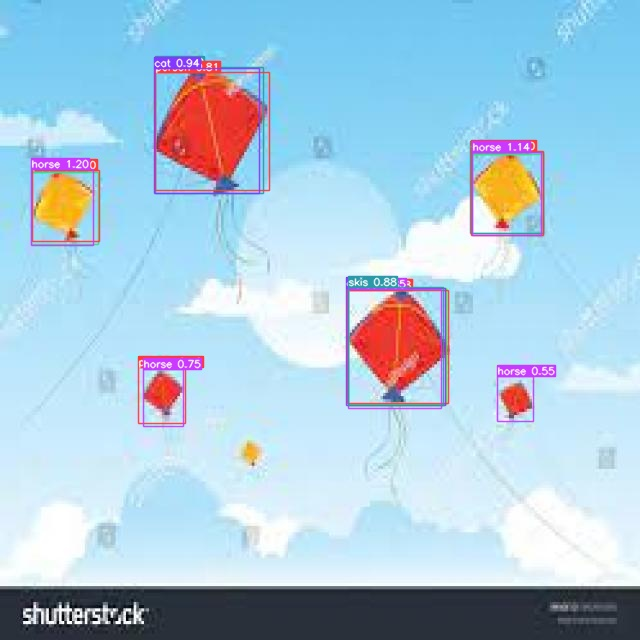

Inference on android app shows correct classname.

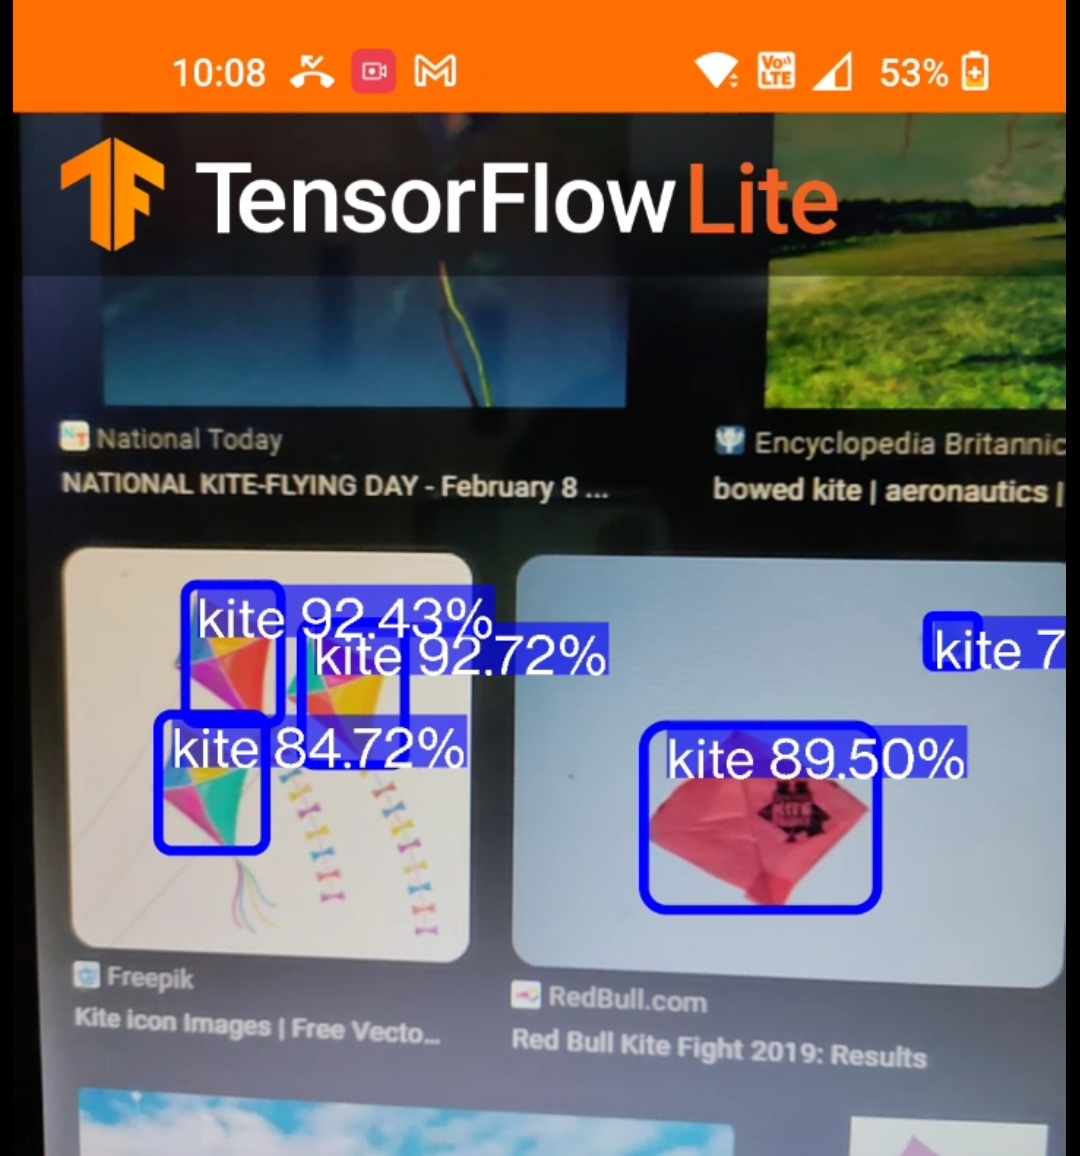